## Importing Library

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Read Dataset

In [124]:
db = pd.read_excel('G:/SD03Q07/fruits.xlsx')

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


## EDA

In [125]:
db.columns

Index(['fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [126]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [127]:
db.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [128]:
print(db.isnull().sum())

fruit_label    0
fruit_name     0
mass           0
width          0
height         0
color_score    0
dtype: int64


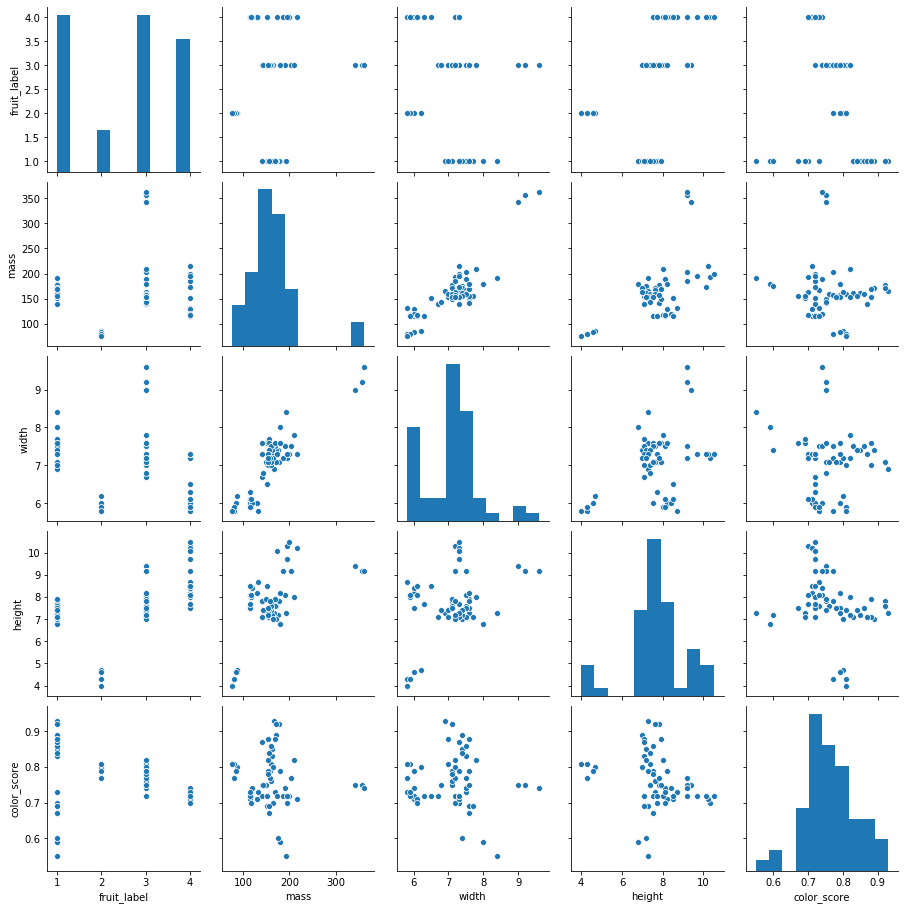

In [129]:
sns.pairplot(db)

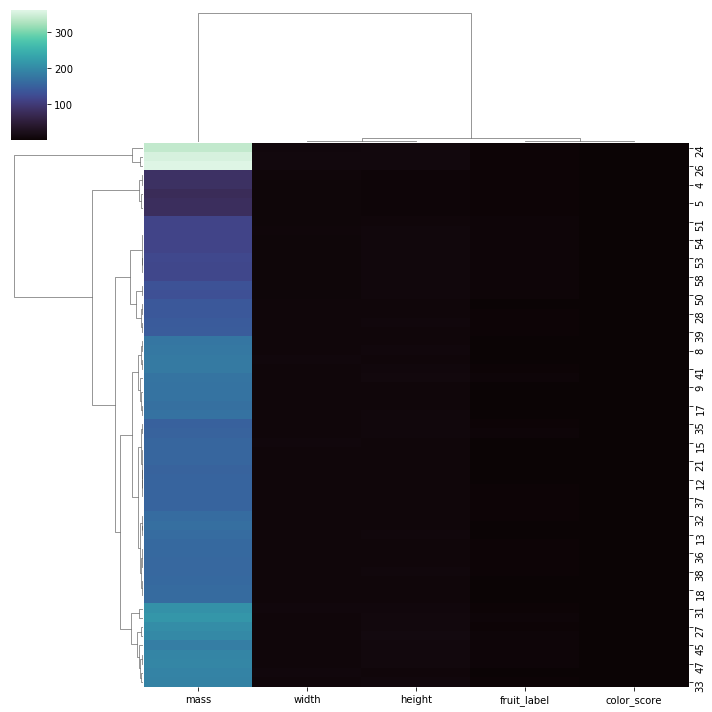

In [130]:
df = db.copy()
df = df.drop(['fruit_name'],axis=1)
sns.clustermap(df, cmap='mako')

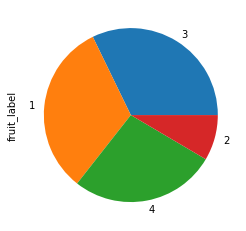

In [131]:
db.fruit_label.value_counts().plot(kind="pie")

## Visualizing the outliers

<function matplotlib.pyplot.show(*args, **kw)>

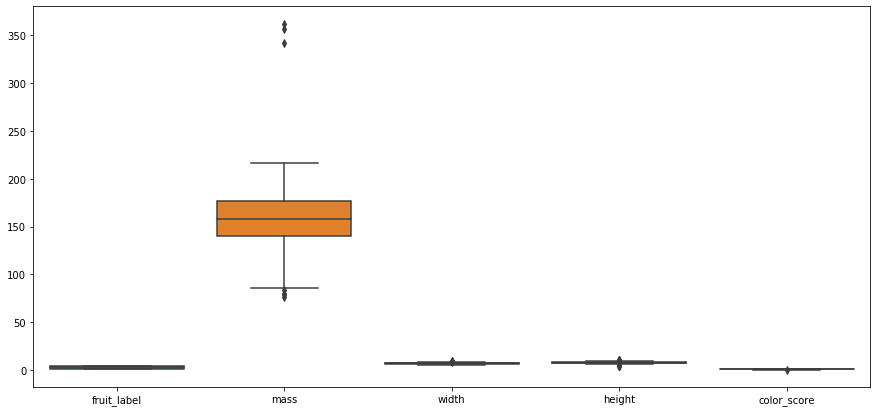

In [132]:
plt.figure(figsize=(15,7))
sns.boxplot(data=db)
plt.show

## Removing Outliers for Mass

In [133]:
Q1 = db["mass"].quantile(0.25)
Q3 = db["mass"].quantile(0.75)
IQR = Q3 - Q1
db["mass"] = db["mass"][~((db["mass"] < (Q1 - 1.5 * IQR)) |(db["mass"] > (Q3 + 1.5 * IQR)))]

## Filling Null Values

In [134]:
db.dropna(subset = ["mass"], inplace=True)
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  52 non-null     int64  
 1   fruit_name   52 non-null     object 
 2   mass         52 non-null     float64
 3   width        52 non-null     float64
 4   height       52 non-null     float64
 5   color_score  52 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.8+ KB


## Splitting the data

In [135]:
x= db.iloc[:,2:].values  
y= db.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size = 1/3, random_state = 0 ) 

## Data Scaling

In [136]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## KNN Model

In [141]:
class K_Nearest_Neighbors_Classifier() :    
    def __init__( self, K ) :     
        self.K = K 

    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train          
        self.Y_train = Y_train    
        self.m, self.n = X_train.shape 
           
    def predict( self, X_test ) :         
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros( self.m_test )           
        for i in range( self.m_test ) :              
            x = self.X_test[i]       
            neighbors = np.zeros( self.K )             
            neighbors = self.find_neighbors( x )         
            Y_predict[i] = mode( neighbors )[0][0]                   
        return Y_predict 
          
    def find_neighbors( self, x ) :           
        euclidean_distances = np.zeros( self.m )           
        for i in range( self.m ) :               
            d = self.euclidean( x, self.X_train[i] )               
            euclidean_distances[i] = d           
        inds = euclidean_distances.argsort()           
        Y_train_sorted = self.Y_train[inds]           
        return Y_train_sorted[:self.K] 
                    
    def euclidean( self, x, x_train ) :          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 

def main() : 
    X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size = 1/3, random_state = 0 )     
    model = K_Nearest_Neighbors_Classifier( K = 3 )       
    model.fit( X_train, Y_train )       
    model1 = KNeighborsClassifier( n_neighbors = 3 )      
    model1.fit( X_train, Y_train ) 
    Y_pred = model.predict( X_test )      
    Y_pred1 = model1.predict( X_test ) 

    correctly_classified = 0  
    correctly_classified1 = 0  
    count = 0    
    for count in range( np.size( Y_pred ) ) :       
        if Y_test[count] == Y_pred[count] :    
            correctly_classified = correctly_classified + 1
        if Y_test[count] == Y_pred1[count] :   
            correctly_classified1 = correctly_classified1 + 1  
        count = count + 1
    print( "Accuracy :  ", ( correctly_classified1 / count ) * 100 ) 

In [142]:
if __name__ == "__main__" :  
    main()

Accuracy :   88.88888888888889


## Model Evaluation

In [139]:
error = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

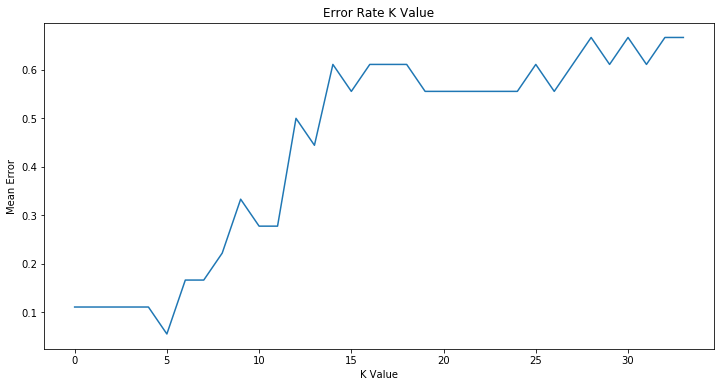

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(error,markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')